### 1. Library import

In [87]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import Feature Engineering/Preprocessing Data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

# Import models
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

# Import cross val and tuning
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

# Import model evaluation
from sklearn.metrics import classification_report, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Model inference
import pickle

from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score

# import warning
import warnings
warnings.filterwarnings('ignore')


### 2. dataset import

In [70]:
df_ori = pd.read_csv('bank-additional.csv', delimiter=";")

df = df_ori.copy()
pd.set_option('display.max_columns', None)
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,53,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,219,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,64,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,528,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


### 3. Dataset check

In [4]:
# null count and data type checking #1
#df.info()

# null value cheking #2
for i in df:
    if i == None:
        number_null = data.isnull().sum()
        print(number_null)
    else:
        break
print(f' Yunus Congratullation yaa!! There are no null value in this data')


# null checking #3
#print(df.isnull().sum())
#print(f'{round(df.isnull().mean()*100,2)}')

 Yunus Congratullation yaa!! There are no null value in this data


### incase, if null data are detected in your dataset the .dropna will be used
#### df.dropna(inplace=True) 

### 4. Columns check


In [5]:
df.columns


Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [85]:
# Split num cat col
X = df.drop(['y'],axis=1)
y = df.y

In [73]:
# check after drop
print(df.isnull().sum())
print(f'{round(df.isnull().mean()*100,2)}')

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64
age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
dtype: float64


In [74]:
df.dropna(inplace = True)

In [75]:
df.duplicated().sum()

0

In [76]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=70)
X_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
2551,56,retired,married,high.school,no,yes,yes,cellular,jul,fri,308,2,999,0,nonexistent,-2.9,92.469,-33.6,1.059,5076.2
1118,36,services,married,high.school,no,no,yes,telephone,may,wed,166,5,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0
4097,41,blue-collar,divorced,basic.9y,no,no,no,cellular,aug,tue,102,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1
760,36,technician,married,basic.6y,no,no,no,cellular,apr,mon,316,2,999,1,failure,-1.8,93.075,-47.1,1.405,5099.1
1244,36,blue-collar,single,basic.9y,unknown,yes,no,cellular,jul,mon,221,8,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1


I assume that the correlation of  'marital', 'housing', 'campaign', 'loan', 'euribor3m', 'contact', 'month', 'day_of_week', 'default', 'poutcome', 'pdays' are low. so I decided to remove it from our dataset using feature selection


In [77]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [78]:
# Feature selection
X_train.drop(['marital', 'housing', 'campaign', 'loan', 'euribor3m', 'contact', 'month', 'day_of_week', 'default', 'poutcome', 'pdays'], axis=1, inplace=True)
X_test.drop(['marital', 'housing', 'campaign', 'loan', 'euribor3m', 'contact', 'month', 'day_of_week', 'default', 'poutcome', 'pdays'], axis=1, inplace=True)
X_train.columns

Index(['age', 'job', 'education', 'duration', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'nr.employed'],
      dtype='object')

### 5. numerical and categorical classification and separation

In [79]:
# Split num and cat col
num_col = X_train.select_dtypes(exclude=['object']).columns.tolist()
cat_col = X_train.select_dtypes(include=['object']).columns.tolist()

print(f'numerical :{num_col}')
print(f'categorical:{cat_col}')

numerical :['age', 'duration', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'nr.employed']
categorical:['job', 'education']


### 6. Scalling and Encoding

In [80]:
# Feature scaling and encoding in column transformer
scaler = StandardScaler()
encoder = OneHotEncoder(handle_unknown='ignore',sparse_output=False) #sparse vs dense matrix

preprocess = ColumnTransformer(
    transformers=[
        ('numerical', scaler,num_col),
        ('categorical', encoder,cat_col)
        ], remainder='passthrough'
)
preprocess

ColumnTransformer(remainder='passthrough',
                  transformers=[('numerical', StandardScaler(),
                                 ['age', 'duration', 'previous', 'emp.var.rate',
                                  'cons.price.idx', 'cons.conf.idx',
                                  'nr.employed']),
                                ('categorical',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['job', 'education'])])

### 7. Model pipe line

In [81]:
# Model definition using pipeline
pipe_log = make_pipeline(preprocess,LogisticRegression())
pipe_svc = make_pipeline(preprocess,SVC())
pipe_knn = make_pipeline(preprocess,KNeighborsClassifier())
pipe_nb = make_pipeline(preprocess,GaussianNB())
pipe_dt = make_pipeline(preprocess,DecisionTreeClassifier(random_state=70))
pipe_rf = make_pipeline(preprocess,RandomForestClassifier(random_state=70))
pipe_ada = make_pipeline(preprocess,AdaBoostClassifier())

### 8. Define cross val for each pipeline


In [89]:
f1_scorer = make_scorer(f1_score, pos_label='yes')
cv_log = cross_val_score(pipe_log, X_train, y_train, cv=5, scoring=f1_scorer, n_jobs=-1)
cv_svc = cross_val_score(pipe_svc, X_train, y_train, cv=5, scoring=f1_scorer, n_jobs=-1)
cv_knn = cross_val_score(pipe_knn, X_train, y_train, cv=5, scoring=f1_scorer, n_jobs=-1)
cv_nb = cross_val_score(pipe_nb, X_train, y_train, cv=5, scoring=f1_scorer, n_jobs=-1)
cv_dt = cross_val_score(pipe_dt, X_train, y_train, cv=5, scoring=f1_scorer, n_jobs=-1)
cv_rf = cross_val_score(pipe_rf, X_train, y_train, cv=5, scoring=f1_scorer, n_jobs=-1)
cv_ada = cross_val_score(pipe_ada, X_train, y_train, cv=5, scoring=f1_scorer, n_jobs=-1)

### 9. Finding best model based on Cross_val_score (mean)

In [90]:
name_model = []
cv_scores = 0
for cv,name in zip([cv_log,cv_svc,cv_knn,cv_nb,cv_dt,cv_rf,cv_ada],
                   ['log','svc','knn','nb','dt','rf','ada']):
    
    print(name)
    print('f1-score - All - Cross Validation :', cv)
    print('f1-score - Mean - Cross Validation :', cv.mean())
    print('f1-score - Std - Cross Validation :', cv.std())
    print('f1-score - Range of test set :', (cv.mean()-cv.std()), '-', (cv.mean()+cv.std()))
    print('-'*1)
    if cv.mean() > cv_scores:
        cv_scores = cv.mean()
        name_model = name
    else:
        pass

print(f'Best Model: {name_model}')
print(f'Cross Val Mean from best model: {cv_scores}')

log
f1-score - All - Cross Validation : [0.39215686 0.576      0.44827586 0.44230769 0.5       ]
f1-score - Mean - Cross Validation : 0.47174808342435115
f1-score - Std - Cross Validation : 0.06232026494418187
f1-score - Range of test set : 0.4094278184801693 - 0.534068348368533
-
svc
f1-score - All - Cross Validation : [0.36893204 0.55172414 0.43243243 0.48598131 0.42990654]
f1-score - Mean - Cross Validation : 0.4537952919331416
f1-score - Std - Cross Validation : 0.06140816622949981
f1-score - Range of test set : 0.3923871257036418 - 0.5152034581626415
-
knn
f1-score - All - Cross Validation : [0.42477876 0.53435115 0.38596491 0.47540984 0.36893204]
f1-score - Mean - Cross Validation : 0.4378873386562684
f1-score - Std - Cross Validation : 0.060557097510095595
f1-score - Range of test set : 0.3773302411461728 - 0.49844443616636397
-
nb
f1-score - All - Cross Validation : [0.4047619  0.41706161 0.36734694 0.46927374 0.38095238]
f1-score - Mean - Cross Validation : 0.40787931577619263

### 10. best fit


#### The best model is Random Forest with cross val mean is about 0.5255

### 11. Train best model

In [107]:
pipe_rf.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical', StandardScaler(),
                                                  ['age', 'duration',
                                                   'previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx',
                                                   'nr.employed']),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['job', 'education'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=70))])

### 12.RF model evaluation

In [108]:
# Evaluate model RF
y_pred_train = pipe_rf.predict(X_train)
y_pred_test = pipe_rf.predict(X_test)

# Print classification report
print(f'Random Forest - train - Before Tuning:')
print(f'{classification_report(y_train, y_pred_train)}')
print('')
print(f'Random Forest - test - Before Tuning:')
print(f'{classification_report(y_test, y_pred_test)}')

Random Forest - train - Before Tuning:
              precision    recall  f1-score   support

          no       1.00      1.00      1.00      2935
         yes       1.00      1.00      1.00       360

    accuracy                           1.00      3295
   macro avg       1.00      1.00      1.00      3295
weighted avg       1.00      1.00      1.00      3295


Random Forest - test - Before Tuning:
              precision    recall  f1-score   support

          no       0.92      0.97      0.94       733
         yes       0.58      0.31      0.40        91

    accuracy                           0.90       824
   macro avg       0.75      0.64      0.67       824
weighted avg       0.88      0.90      0.89       824



### 13. Check False Negative and False Positive

Text(0.5, 1.0, 'Before Tuning-test')

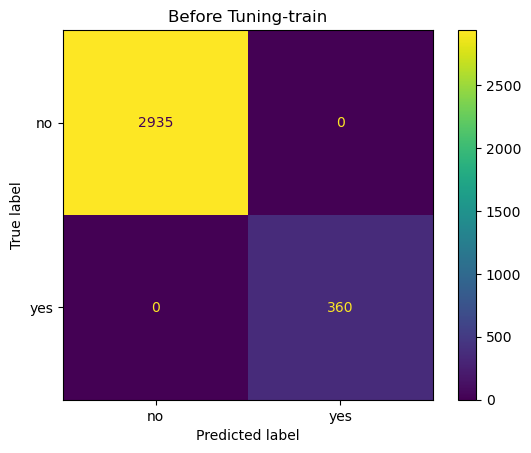

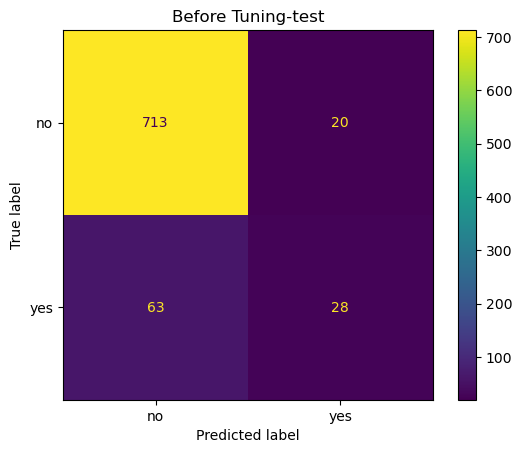

In [109]:
cm_train = confusion_matrix(y_train, y_pred_train, labels=pipe_rf.classes_)
cm_test = confusion_matrix(y_test, y_pred_test, labels=pipe_rf.classes_)

disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=pipe_rf.classes_)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=pipe_rf.classes_)

disp_train.plot()
plt.title('Before Tuning-train')

disp_test.plot()
plt.title('Before Tuning-test')

The value of train FN and FP = 0, it means that the f1-score train test is 100%.


The Test set FN = 63, it means that there are 63 number of values are wrong predicted. the prediction is  survived(negative) but the actual datanya is survived(positive).
The test set FP nya = 20 , it measn that there are 20 number or valuesaare wrong predicted, the prediction is  survived(positive) but the actual datanya is survived(negative)

### 14. Create function to table reports recap

In [96]:
# create function to table reports recap
all_reports = {}
def performance_report(all_reports, y_train, y_pred_train, y_test,y_pred_test, name):
    # calculate f1-score
    train_f1 = f1_score(y_train,y_pred_train, pos_label='yes')
    test_f1 = f1_score(y_test,y_pred_test, pos_label='yes')

    # calculate fp fn
    cm_train = confusion_matrix(y_train, y_pred_train, labels=pipe_rf.classes_)
    cm_test = confusion_matrix(y_test, y_pred_test, labels=pipe_rf.classes_)
    
    # extract FP FN
    fn_train = cm_train[1,0]
    fp_train = cm_train[0,1]
    fn_test = cm_test[1,0]
    fp_test = cm_test[0,1]

    # create dictionary
    score_reports = {
        'train-f1score':train_f1,
        'test-f1score':test_f1,
        'train-false negative':fn_train,
        'test-false negative':fn_test,
        'train-false positive':fp_train,
        'test-false positive':fp_test
    }

    # add reports
    all_reports[name] = score_reports
    return all_reports

In [97]:
all_reports = performance_report(all_reports, y_train, y_pred_train, y_test, y_pred_test, 'Before Tuning')
pd.DataFrame(all_reports)

,Before Tuning
test-f1score,0.402878
test-false negative,63.000000
test-false positive,20.000000
train-f1score,1.000000
train-false negative,0.000000
train-false positive,0.000000


In [98]:
np.linspace(1,10,10)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

### 16. Define the random forest parameter grid

In [100]:
# Define the random forest parameter grid
params = {
    'randomforestclassifier__n_estimators':(10,20,30,40,50,60,70,80,90,100,110),
    'randomforestclassifier__criterion':['gini','entropy','log_loss'],
    'randomforestclassifier__max_depth':(1,2,3,4,5,6,7,8,9,10),
    'randomforestclassifier__min_samples_split':(2,4,6,8,10),
    'randomforestclassifier__min_samples_leaf':(1,2,3,4,5)
}

# Define Random search
tuning = RandomizedSearchCV(pipe_rf, param_distributions = params, n_iter=25,cv=5, scoring=f1_scorer, n_jobs=-1, random_state = 27)

# Train the tune model
tuning.fit(X_train, y_train)

# Get best parameters
best_params = tuning.best_params_
print(f'Best Parameters: {best_params}')

Best Parameters: {'randomforestclassifier__n_estimators': 60, 'randomforestclassifier__min_samples_split': 4, 'randomforestclassifier__min_samples_leaf': 2, 'randomforestclassifier__max_depth': 8, 'randomforestclassifier__criterion': 'gini'}


### 17. Get the best hyperparameters

In [101]:
# Get the best hyperparameters
bestParams = tuning.best_estimator_
bestParams

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical', StandardScaler(),
                                                  ['age', 'duration',
                                                   'previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx',
                                                   'nr.employed']),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['job', 'education'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=8, min_samples_leaf=2,
                                        min_samples_split=4, n_estimators=60,
                                        random_state=70))])

### 18. Define best parameter & model tuning

In [102]:
# Define best param & model tuning
best_rf = tuning.best_estimator_

# Evaluate best RF
y_pred_train_best = best_rf.predict(X_train)
y_pred_test_best = best_rf.predict(X_test)

# Print classification report
print(f'Random Forest - train - After Tuning:')
print(f'{classification_report(y_train, y_pred_train_best)}')
print('')
print(f'Random Forest - test - After Tuning:')
print(f'{classification_report(y_test, y_pred_test_best)}')

Random Forest - train - After Tuning:
              precision    recall  f1-score   support

          no       0.94      0.99      0.97      2935
         yes       0.92      0.50      0.65       360

    accuracy                           0.94      3295
   macro avg       0.93      0.75      0.81      3295
weighted avg       0.94      0.94      0.93      3295


Random Forest - test - After Tuning:
              precision    recall  f1-score   support

          no       0.91      0.99      0.95       733
         yes       0.74      0.22      0.34        91

    accuracy                           0.91       824
   macro avg       0.83      0.61      0.64       824
weighted avg       0.89      0.91      0.88       824



### 19. Check False Negative and False Positive - After Tuning

Text(0.5, 1.0, 'After Tuning-test')

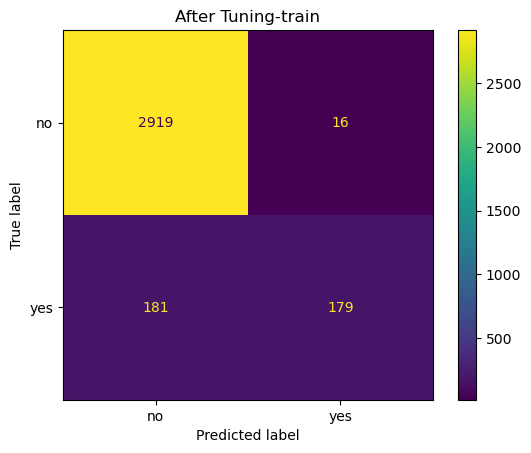

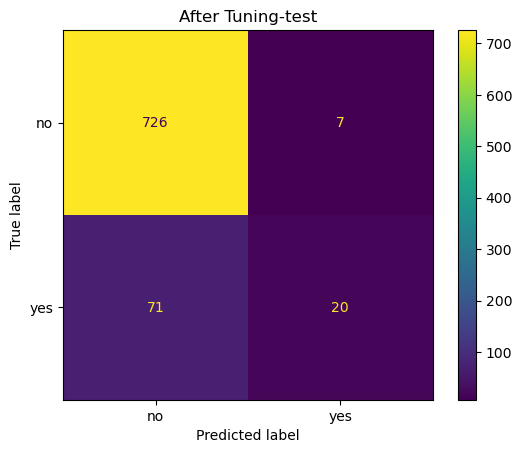

In [103]:
# Check False Negative and False Positive - After Tuning
cm_train_best = confusion_matrix(y_train, y_pred_train_best, labels=best_rf.classes_)
cm_test_best = confusion_matrix(y_test, y_pred_test_best, labels=best_rf.classes_)

disp_train_best = ConfusionMatrixDisplay(confusion_matrix=cm_train_best, display_labels=best_rf.classes_)
disp_test_best = ConfusionMatrixDisplay(confusion_matrix=cm_test_best, display_labels=best_rf.classes_)

disp_train_best.plot()
plt.title('After Tuning-train')

disp_test_best.plot()
plt.title('After Tuning-test')

### 20. Model report

In [104]:
all_reports = performance_report(all_reports, y_train, y_pred_train_best, y_test, y_pred_test_best, 'After Tuning')
pd.DataFrame(all_reports)

,Before Tuning,After Tuning
train-f1score,1.000000,0.645045
test-f1score,0.402878,0.338983
train-false negative,0.000000,181.000000
test-false negative,63.000000,71.000000
train-false positive,0.000000,16.000000
test-false positive,20.000000,7.000000


### 21. Model saving

In [105]:
# Model Saving
with open('best_model.pkl', 'wb') as file_1: # wb = write binary
    pickle.dump(best_rf, file_1)

### 22. Detect all original columns to create new inference data

In [106]:
print(df_ori.columns)
print(df_ori.loc[10])

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')
age                        25
job                  services
marital                single
education            basic.6y
default               unknown
housing                   yes
loan                       no
contact              cellular
month                     jul
day_of_week               thu
duration                  301
campaign                    1
pdays                     999
previous                    0
poutcome          nonexistent
emp.var.rate              1.4
cons.price.idx         93.918
cons.conf.idx           -42.7
euribor3m               4.958
nr.employed            5228.1
y                          no
Name: 10, dtype: object


### 23.Conclusion

**Before Tuning**

With perfect results on training data and poor results on test data, the model exhibits overfitting symptoms.

After Tuning:

Reduced overfitting is indicated by the model's more realistic training performance.
A modest drop in the test F1 score indicates a trade-off between accuracy and sensitivity.
On the test set, there are fewer false positives, which suggests increased accuracy.


**Suggestion**

Evaluate the model's hyperparameters and make any necessary adjustments to boost the test F1 score even further.
Examine additional performance measures including recall, accuracy, and the ROC curve to obtain a deeper understanding of the model's function. 
To make sure the model successfully generalises, think about gathering more data or applying strategies like cross-validation.
